In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

In [90]:
df = pd.read_csv('car_data.csv')

In [91]:
# Having a look into data
df.head(30)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [92]:
# Checking shape(rows, columns) of data 
df.shape

(301, 9)

In [93]:
# Checking for dtypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Printing unique values for ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission','Owner']
                      # columns as other remaining columns could contaion highly variable values.

### for i in df:
    if i in ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission','Owner']:
        print("Unique values for",i, "--->" ,df[i].unique(), ",and those are total :", df[i].nunique(), end = "\n\n")

In [94]:
# Checking for missing or null Values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [95]:
# Checkign Statistical values 
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Removing "Car_Name" in new dataset as its not required for current scenario as it would not help much in 
# prediction the preuce of car as car has a unique name.

In [96]:
df1 = df.drop('Car_Name', axis=1)

In [97]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [98]:
# Creating new column to get new derived column from 'Year' and 'Current_Year' as "No_Of_Year"
df1['Current_Year'] = 2024

In [99]:
# Creating new column named 'No_of_Years' so that we can use this measure for prediction of price in to current year
df1['No_of_Years'] = df1['Current_Year'] - df1['Year']

In [100]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [101]:
# Dropping 'Year' and 'Current_Year' as those won't be the measure used for prediction of price
df1.drop(columns=(['Year', 'Current_Year']), axis = 1, inplace = True)

# Converting Nominal/Categorical Data to Numerical datatype¶

In [102]:
# get_dummies helps to convert categorical into numerical data type just like onehot encoding. 
df1=pd.get_dummies(df1, drop_first=True) 
# Here "drop_first=True" means that we drop first column of that column which gets converted to numerical one 

In [103]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


In [104]:
# Correlation between numerical columns
df1.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


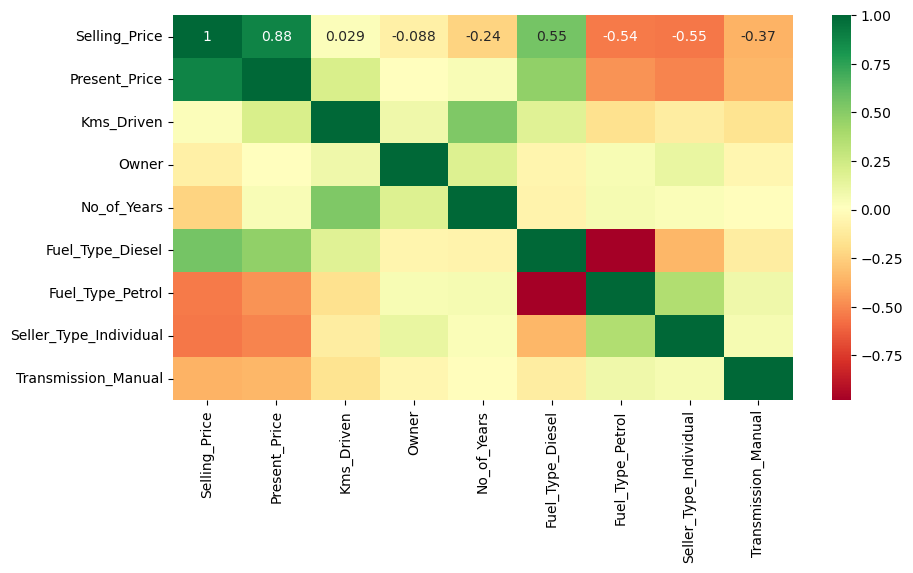

In [105]:
#Plotting Heatmap to check the correlation between each columns
corrmap = df1.corr()
top_corr_features = corrmap.index 
plt.figure(figsize=(10,5))
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Training the model 

# Splitting the data into train_test_split mode

In [106]:
# Independent variables
X = df1.drop("Selling_Price", axis = 1)
# Dependent variables33
y = df1['Selling_Price']

In [107]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,10,False,True,False,True
1,9.54,43000,0,11,True,False,False,True
2,9.85,6900,0,7,False,True,False,True
3,4.15,5200,0,13,False,True,False,True
4,6.87,42450,0,10,True,False,False,True


In [108]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Checking feature importance

### Feature Importance 
from  sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

In [109]:
print(model.feature_importances_)

[0.3955285  0.04281618 0.00040646 0.07561395 0.21487856 0.01779199
 0.11914412 0.13382024]


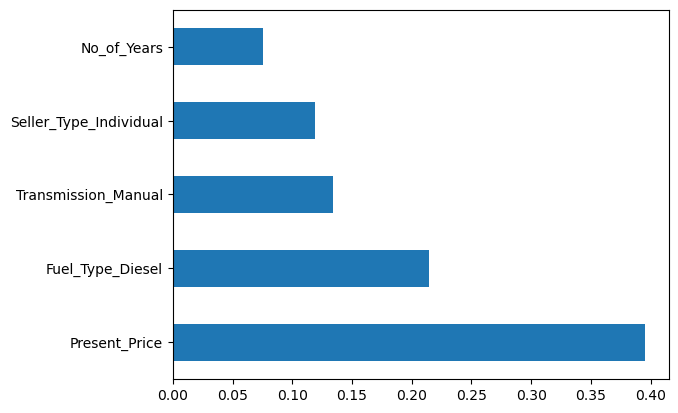

In [110]:
# Plotting the top 5 important features available
feature_importance =pd.Series(model.feature_importances_, index = X.columns)
feature_importance.nlargest(5).plot(kind = 'barh')
plt.show()

# XG Boost 

## training XG Boost Model

In [113]:
 #Splitting the Data into Training Set
# Independent variables
X = df1.drop("Selling_Price", axis = 1)
# Dependent variables
Y = df1['Selling_Price']

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [115]:
X.shape

(301, 8)

In [116]:
Y.shape

(301,)

In [117]:
xgmodel = XGBRegressor()
xgmodel.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [118]:
y_pred_test = xgmodel.predict(X_test)

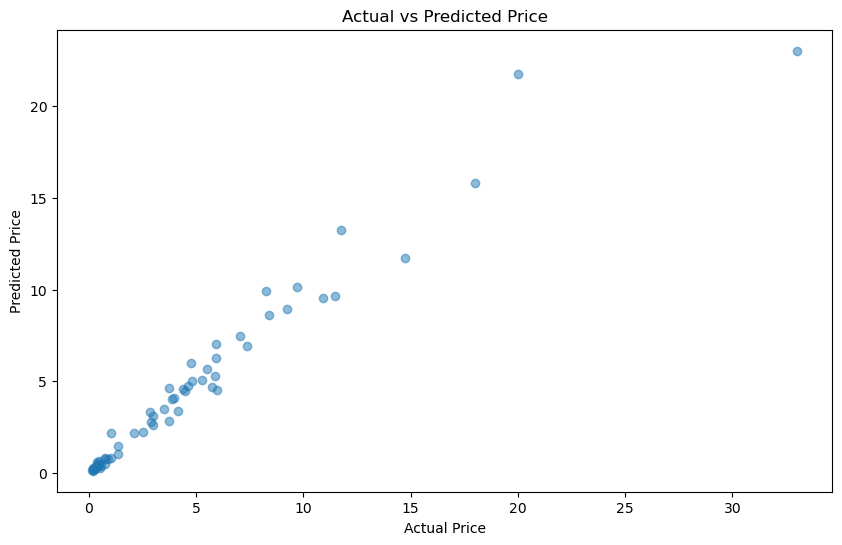

In [119]:
# This shows that there is a positive relationship between the actual price and predicted price, and based on the alignment of points, the predictions are close to the actual price
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_test, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

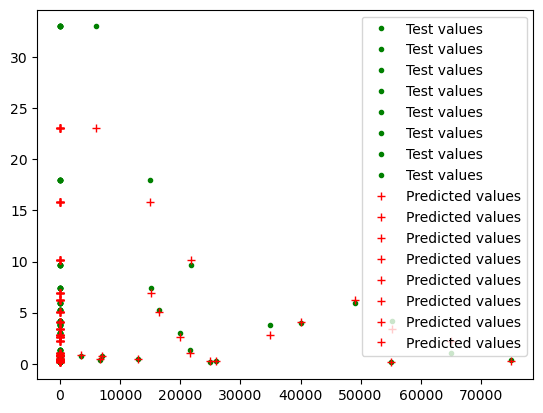

In [120]:
import matplotlib.pyplot as plt

# Plot the test values with green color and label
plt.plot(X_test[20:40], Y_test[20:40], '.', color='green', label='Test values')

# Plot the predicted values with red color and label
plt.plot(X_test[20:40], y_pred_test[20:40], '+', color='red', label='Predicted values')

# Add a legend with the labels specified in the plot commands
plt.legend()

In [122]:
# This shows the accuracy of the testing data applied to this model using Root Mean Squared Error
test_mse = mean_squared_error(Y_test, y_pred_test)
print(f'MSE: {test_mse}')
print(f'RMSE: {np.sqrt(test_mse)}')
print('Coefficient of Determination (R^2 Score):', r2_score(Y_test, y_pred_test))

MSE: 2.2665827367158458
RMSE: 1.5055174315549607
Coefficient of Determination (R^2 Score): 0.9301883771190466


In [123]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgmodel, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')  
print("Cross-Validation Mean Squared Error:", -scores.mean())

Cross-Validation Mean Squared Error: 3.9025331267689984


In [124]:
df1.head(30)

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True
5,9.25,9.83,2071,0,6,True,False,False,True
6,6.75,8.12,18796,0,9,False,True,False,True
7,6.50,8.61,33429,0,9,True,False,False,True
8,8.75,8.89,20273,0,8,True,False,False,True
9,7.45,8.92,42367,0,9,True,False,False,True


In [125]:
Test = df1[['Present_Price', 'Kms_Driven', 'Owner', 'No_of_Years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']]
predictions = xgmodel.predict(Test)
for index, row in df1.head(30).iterrows():
    expected_value = row['Selling_Price']
    print("Predicted Price:", predictions[index])
    print(f"Expected Value: **{expected_value}** \n\n")

Predicted Price: 3.3564231
Expected Value: **3.35** 


Predicted Price: 5.9693747
Expected Value: **4.75** 


Predicted Price: 7.2551084
Expected Value: **7.25** 


Predicted Price: 2.8472548
Expected Value: **2.85** 


Predicted Price: 4.6021576
Expected Value: **4.6** 


Predicted Price: 9.247217
Expected Value: **9.25** 


Predicted Price: 6.7317653
Expected Value: **6.75** 


Predicted Price: 6.5046263
Expected Value: **6.5** 


Predicted Price: 8.7425785
Expected Value: **8.75** 


Predicted Price: 7.4503694
Expected Value: **7.45** 


Predicted Price: 3.3139513
Expected Value: **2.85** 


Predicted Price: 6.870447
Expected Value: **6.85** 


Predicted Price: 7.5019007
Expected Value: **7.5** 


Predicted Price: 6.0624638
Expected Value: **6.1** 


Predicted Price: 2.2532701
Expected Value: **2.25** 


Predicted Price: 7.748279
Expected Value: **7.75** 


Predicted Price: 7.261942
Expected Value: **7.25** 


Predicted Price: 7.748279
Expected Value: **7.75** 


Predicted Price: 3.

# Random Forests

In [ ]:
# Independent variables
X = df1.drop("Selling_Price", axis = 1)
# Dependent variables
y = df1['Selling_Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
y_train.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rnd = RandomForestRegressor()

In [ ]:
rnd.fit(X_train, y_train)

In [ ]:
y_pred = rnd.predict(X_test)

In [ ]:
y_pred[:10]

In [ ]:
list(y_test[:10])

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print('MSE---->', metrics.mean_squared_error(y_test, y_pred))
print('RMSE--->', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Using Linear Regression for multi-linear regression
scores = cross_val_score(rnd, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  
print("Cross-Validation Mean Squared Error:", -scores.mean())

In [ ]:
from sklearn.metrics import r2_score, adjusted_rand_score
print('R^2---->',r2_score(y_test, y_pred))

In [ ]:
sns.kdeplot(y_test - y_pred)

In [ ]:
plt.scatter(y_test, y_pred) 

# Training Multi-linear Regression 

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=115)

In [51]:
x_train.shape

(270, 8)

In [52]:
x_test.shape

(31, 8)

In [53]:
y_test.shape

(31,)

In [54]:
y_train.shape

(270,)

# Linear Regression Model

In [55]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)

LinearRegression()

In [56]:
# Predicting values for x_test
y_pred = linr.predict(x_test)

In [57]:
# printing out top 10 predicted values
y_pred[:10]

array([7.76073064, 5.31560122, 4.36258623, 4.82600003, 1.79623068,
       4.27009878, 6.03105235, 4.34938263, 6.22712928, 0.84409803])

In [58]:
# Verfying the test values with above predicted values
print(list(y_test[:10]), end = " ")

[8.4, 4.9, 5.25, 4.0, 0.48, 3.15, 6.4, 4.1, 7.5, 0.65] 

In [59]:
from sklearn import metrics
print('MSE---->', metrics.mean_squared_error(y_test, y_pred))
print('RMSE--->', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE----> 0.7375378885376607
RMSE---> 0.8588002611420543


In [60]:
from sklearn.metrics import r2_score, adjusted_rand_score
print('R^2---->',r2_score(y_test, y_pred))

R^2----> 0.9337282701384608


In [61]:
from sklearn.model_selection import cross_val_score
# Using Linear Regression for multi-linear regression
scores = cross_val_score(linr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')  
print("Cross-Validation Mean Squared Error:", -scores.mean())


Cross-Validation Mean Squared Error: 5.114271500955855


/Users/carolinarojas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Selling_Price', ylabel='Density'>

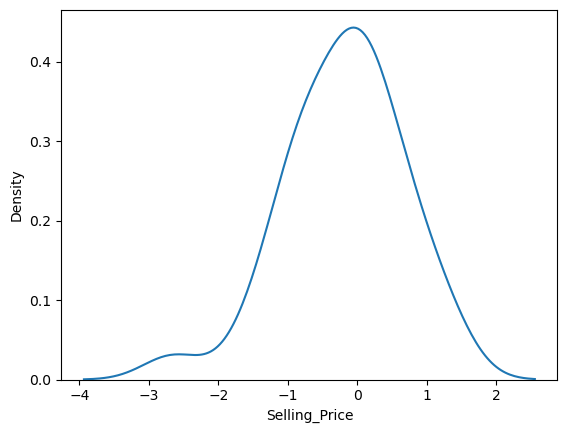

In [62]:
sns.kdeplot(y_test - y_pred)

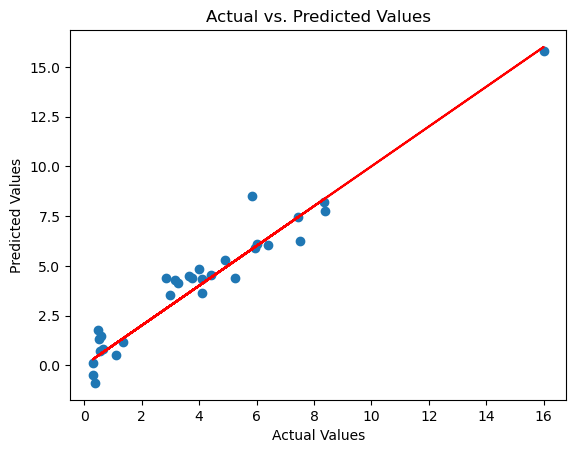

In [82]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')  # Adding a line of best fit (y = x)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


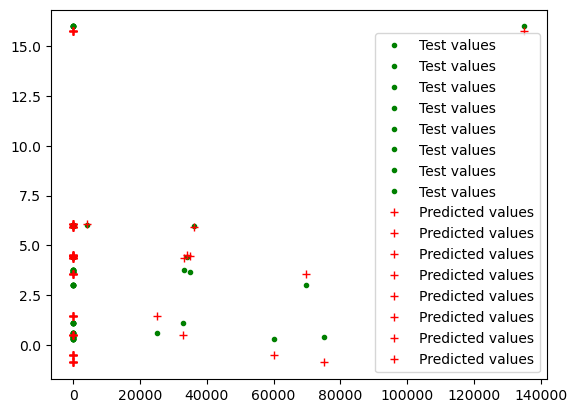

In [88]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Plot the test values with green color and label
plt.plot(x_test[20:40], y_test[20:40], '.', color='green', label='Test values')

# Plot the predicted values with red color and label
plt.plot(x_test[20:40], y_pred[20:40], '+', color='red', label='Predicted values')

# Add a legend with the labels specified in the plot commands
plt.legend()

In [65]:
df1.head(30)

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True
5,9.25,9.83,2071,0,6,True,False,False,True
6,6.75,8.12,18796,0,9,False,True,False,True
7,6.50,8.61,33429,0,9,True,False,False,True
8,8.75,8.89,20273,0,8,True,False,False,True
9,7.45,8.92,42367,0,9,True,False,False,True


In [66]:
import pandas as pd
Test = pd.DataFrame([[5.59, 27000 , 0, 10, 0, 1, 0, 1]], columns=['Present_Price', 'Kms_Driven', 'Owner', 'No_of_Years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'])
predictions = linr.predict(Test)
print("Predicted Price:", predictions)
print(f"The actual cost of the car is **{df1.iloc[0,0]}** , and the predicted value of the same is {predictions} using multi-linear regression")

Predicted Price: [3.90118409]
The actual cost of the car is **3.35** , and the predicted value of the same is [3.90118409] using multi-linear regression


In [67]:
from sklearn import metrics
print('MSE---->', metrics.mean_squared_error(y_test, y_pred))
print('RMSE--->', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE----> 0.7375378885376607
RMSE---> 0.8588002611420543


In [69]:
import pandas as pd

# Assuming 'df1' is your DataFrame containing the data
# Drop any non-numeric columns if necessary
X_test = df1[['Present_Price', 'Kms_Driven', 'Owner', 'No_of_Years', 
              'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 
              'Seller_Type_Individual', 'Transmission_Manual']]

# Make predictions for all rows in the DataFrame
predictions = linr.predict(X_test)

# Iterate over each row in the DataFrame and print the actual and predicted values
for index, row in df1.head(30).iterrows():
    actual_values = row[['Selling_Price']]
    predicted_values = predictions[index]
    print(f"Actual values: {actual_values}, Predicted values: {predicted_values}\n")


Actual values: Selling_Price    3.35
Name: 0, dtype: object, Predicted values: 3.90118408703544

Actual values: Selling_Price    4.75
Name: 1, dtype: object, Predicted values: 6.925250184414918

Actual values: Selling_Price    7.25
Name: 2, dtype: object, Predicted values: 7.0990715996072105

Actual values: Selling_Price    2.85
Name: 3, dtype: object, Predicted values: 2.2298747784132154

Actual values: Selling_Price    4.6
Name: 4, dtype: object, Predicted values: 6.155820572675694

Actual values: Selling_Price    9.25
Name: 5, dtype: object, Predicted values: 9.321569161339891

Actual values: Selling_Price    6.75
Name: 6, dtype: object, Predicted values: 5.464115882768571

Actual values: Selling_Price    6.5
Name: 7, dtype: object, Predicted values: 7.378139228776837

Actual values: Selling_Price    8.75
Name: 8, dtype: object, Predicted values: 7.989170528806843

Actual values: Selling_Price    7.45
Name: 9, dtype: object, Predicted values: 7.452051795364126

Actual values: Sellin